In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline 

# Удаление дубликатов в данных

In [3]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates()

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [6]:
data.T.drop_duplicates().T

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [7]:
data.drop(data.columns[data.nunique() == 1], axis=1)

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [8]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [9]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [10]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [11]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna()

,0,1,2,3


In [13]:
data.dropna(how="all")

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,0.260701,NaN,NaN
1,-0.665155,NaN,NaN
2,-1.120851,NaN,-0.356412
3,0.259926,NaN,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [17]:
df.fillna(0)

,0,1,2
0,0.260701,0.000000,0.000000
1,-0.665155,0.000000,0.000000
2,-1.120851,0.000000,-0.356412
3,0.259926,0.000000,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [18]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,0.260701,0.500000,0.000000
1,-0.665155,0.500000,0.000000
2,-1.120851,0.500000,-0.356412
3,0.259926,0.500000,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [19]:
df.fillna(method="bfill")

,0,1,2
0,0.260701,0.590660,-0.356412
1,-0.665155,0.590660,-0.356412
2,-1.120851,0.590660,-0.356412
3,0.259926,0.590660,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [20]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,0.260701,NaN,-0.356412
1,-0.665155,NaN,-0.356412
2,-1.120851,0.590660,-0.356412
3,0.259926,0.590660,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [21]:
df.fillna(data.mean())

,0,1,2
0,0.260701,6.500000,3.000000
1,-0.665155,6.500000,3.000000
2,-1.120851,6.500000,-0.356412
3,0.259926,6.500000,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


In [22]:
df.fillna(data.median())

,0,1,2
0,0.260701,6.500000,3.000000
1,-0.665155,6.500000,3.000000
2,-1.120851,6.500000,-0.356412
3,0.259926,6.500000,-0.457557
4,-0.928337,0.590660,0.799451
5,-1.274565,-0.613458,-0.087292
6,1.591160,0.619356,1.354343


Медиана более устойчива к выбросам

In [23]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

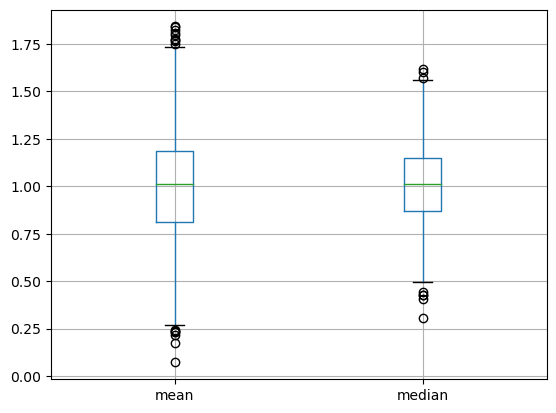

In [24]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [25]:
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,0.260701,NaN,NaN,1
1,-0.665155,NaN,NaN,1
2,-1.120851,NaN,-0.356412,0
3,0.259926,NaN,-0.457557,0
4,-0.928337,0.590660,0.799451,0
5,-1.274565,-0.613458,-0.087292,0
6,1.591160,0.619356,1.354343,0


Замена значений

In [26]:
data = pd.Series([1., -999., 2., -999., 4., 3.])
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [27]:
data.replace(-999, np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [28]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [29]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [30]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [31]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

In [32]:
enc = OrdinalEncoder()
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [33]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [34]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [35]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [38]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

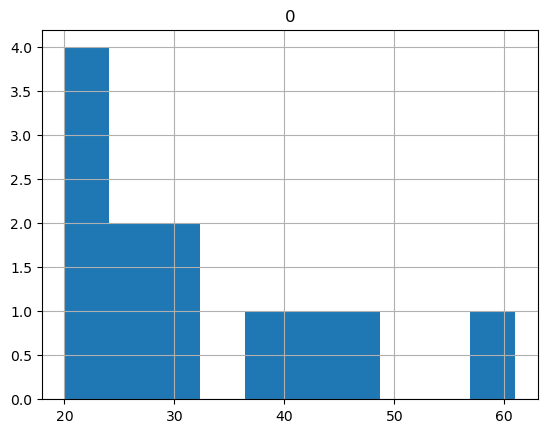

In [39]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [40]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [41]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [43]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

C:\Users\feday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

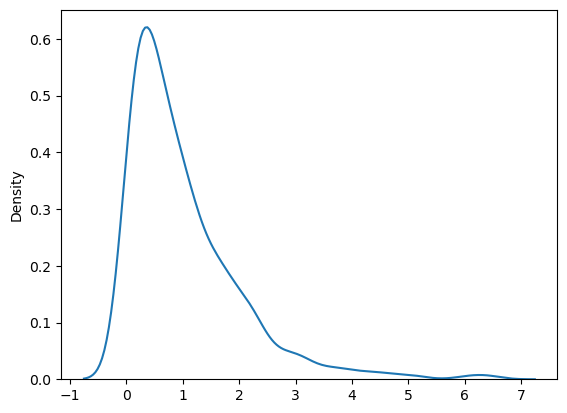

In [44]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)

C:\Users\feday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

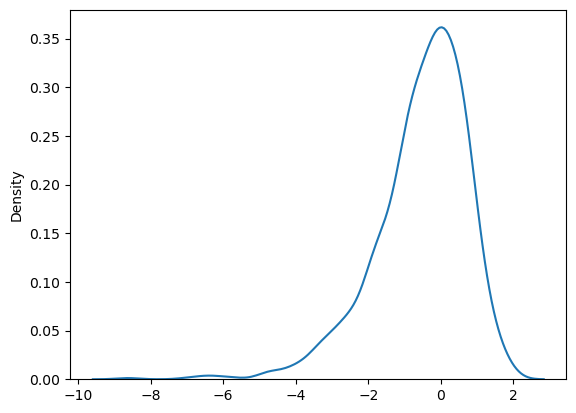

In [45]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)

C:\Users\feday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

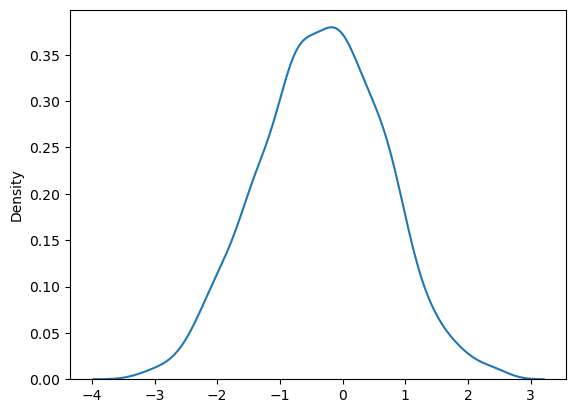

In [46]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)

In [47]:
best_lambda

0.28151344971741415

# Домашнее задание

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [49]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

## Baseline

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [90]:
X = df.iloc[:,1:].drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
reg = LinearRegression().fit(train_X, train_y)

In [53]:
reg.score(train_X, train_y)

0.4555406785040049

In [54]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865293

In [55]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [56]:
scores

{'fit_time': array([0.05385351, 0.04588246, 0.04786992]),
 'score_time': array([0.00997353, 0.00997257, 0.01296353]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [57]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854425

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [64]:
df.nunique()

index                             43245
back-suspension                      11
battery-capacity                     75
charge-time                       43212
compression                         188
consumption-mixed                   205
cylinders-order                       7
cylinders-value                      11
engine-feeding                        9
engine-start                         98
engine-stop                          97
engine-type                           5
gear-type                             3
luxury                            42703
max-speed                           268
power-electro-kw                     66
supply-system                         5
valves                             3006
valvetrain                            5
weight                             1610
configurations_auto-premiere      43227
configurations_back-wheel-base      450
configurations_front-brake            5
configurations_safety-rating          3
configurations_seats                 34


In [67]:
df['models_light-and-commercial'].unique()

array([0, 1], dtype=int64)

In [62]:
df.duplicated().sum()

0

<AxesSubplot:>

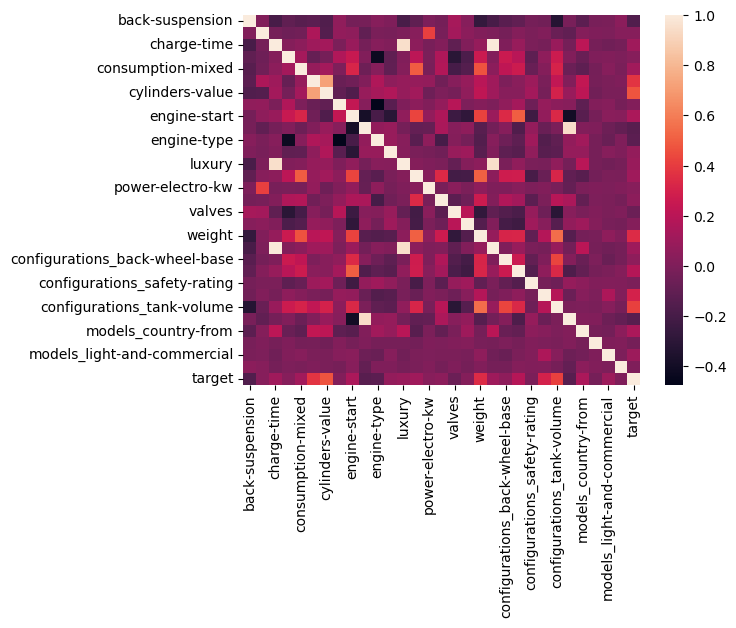

In [73]:
sns.heatmap(df.iloc[:,1:].corr())

C:\Users\feday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

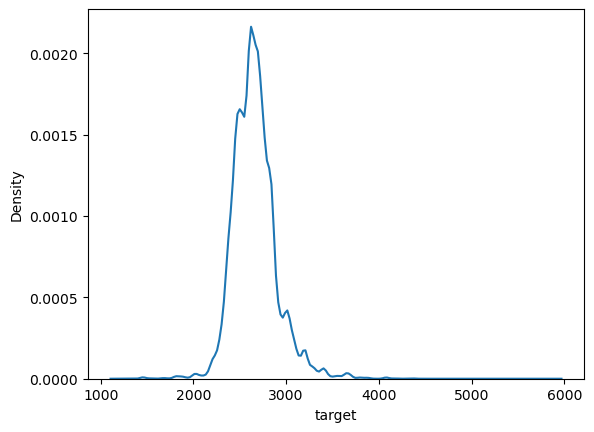

In [81]:
sns.distplot(df.target, hist=False , kde=True)

C:\Users\feday\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

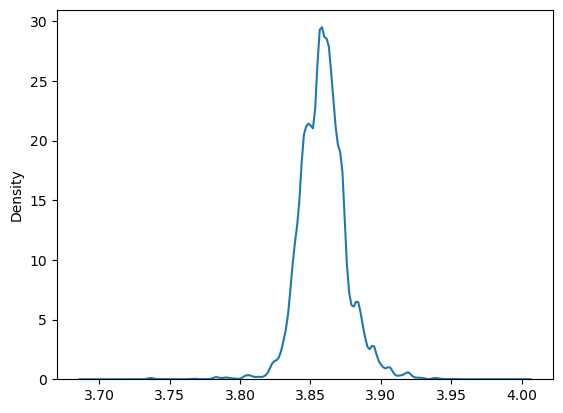

In [77]:
transformed_df, best_lambda = boxcox(df.target) 
sns.distplot(transformed_df, hist=False , kde=True)

In [91]:
import statsmodels.api as sm
from scipy import stats

X = train_X
y = train_y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     807.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:25:20   Log-Likelihood:            -1.9038e+05
No. Observations:               28974   AIC:                         3.808e+05
Df Residuals:                   28943   BIC:                         3.811e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [94]:
df2 = df.drop(['index','back-suspension', 'cylinders-order', 'supply-system', 'models_group', 'models_male'], axis=1)
df2

,battery-capacity,charge-time,compression,consumption-mixed,cylinders-value,engine-feeding,engine-start,engine-stop,engine-type,gear-type,...,configurations_auto-premiere,configurations_back-wheel-base,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_light-and-commercial,target
0,-1.0,36457,9.0,4.3,3,4,2006,2018,2,1,...,36479,1300.0,1,2,13,40.0,2018.0,16,0,2360
1,-1.0,44872,8.0,-1.0,7,4,1982,1993,2,2,...,44895,1555.0,4,2,13,108.0,1993.0,34,0,3060
2,-1.0,55927,16.0,4.2,4,5,2014,2018,0,1,...,55963,1534.0,4,2,13,55.0,2019.0,35,0,2648
3,-1.0,41405,10.3,-1.0,4,4,2000,2003,2,1,...,41425,1495.0,4,2,13,55.0,2003.0,10,0,2513
4,-1.0,22523,19.0,-1.0,4,8,2000,2005,0,1,...,22491,1515.0,4,1,13,62.0,2005.0,10,0,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,-1.0,34558,11.2,6.6,4,4,2004,2016,2,1,...,34570,1425.0,1,2,13,47.0,2016.0,15,0,2510
43241,-1.0,38268,9.6,5.8,4,2,2013,2015,2,1,...,38286,1551.0,4,2,13,65.0,2015.0,10,0,2808
43242,-1.0,8958,10.0,9.3,4,4,1991,1999,2,1,...,8903,1460.0,4,2,13,55.0,1999.0,16,0,2520
43243,-1.0,20293,8.5,-1.0,5,4,2002,2004,2,0,...,20263,1548.0,1,2,13,70.0,2004.0,28,0,2755


In [95]:
X = df2.drop(["target"], axis=1)
y = df2[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
X = train_X
y = train_y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     968.3
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:28:35   Log-Likelihood:            -1.9038e+05
No. Observations:               28974   AIC:                         3.808e+05
Df Residuals:                   28948   BIC:                         3.810e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [100]:
X = df2.drop(["target"], axis=1)
y = df2[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_X)
scaler = MinMaxScaler()
X_train_poly_scaler = scaler.fit_transform(X_train_poly)
X = X_train_poly_scaler
y = train_y


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     169.9
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:38:51   Log-Likelihood:            -1.8302e+05
No. Observations:               28974   AIC:                         3.667e+05
Df Residuals:                   28627   BIC:                         3.696e+05
Df Model:                         346                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.497e+04   1.13e+04      2.210      0.0